# EDA: Exploratory Data Analysis Dataframe vehicles_us

The following analysis aims to explore the various features of the vehicles_us file and repair some inconsistencies in the data in order to extract knowledge from it.

### Loading necessary Python libraries and initial file scanning


In [88]:
#Load the libraries

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
# load dataset vehicles_us_raw.csv
df = pd.read_csv('../vehicles_us_raw.csv')

In [90]:
#data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [91]:
#Missing values in the file
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [92]:
#data visualization
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Data Cleaning

The code takes care of handling missing values ​​in the DataFrame, ensuring that certain columns are filled with zeros and converted to integers, while missing values ​​in the paint color column are replaced with "unknown".

In [93]:
#change to value '0' for missing values, columns is_4wd', 'cylinders', 'model_year', 'odometer'
fillna_and_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in fillna_and_int:
  df[i] = df[i].fillna(0)
  df[i] = df[i].astype(int)

# change to value  unknown column 'paint_color'
df["paint_color"] = df["paint_color"].fillna("unknown")

This function will check if the cylinder is missing and if it is it will fill it with the most common cylinder for that car model and year

In [94]:
def cylinder_check(row):
    '''This function checks if the cylinder is missing; if so, it fills it with the most common one for that car model and year'''
    if row["cylinders"] == 0:
        cylinder = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]]["cylinders"].unique()
        for i in range(len(cylinder)):
            if cylinder[i] != 0:
                return cylinder[i]
    return row["cylinders"]

df["cylinders"] = df.apply(cylinder_check, axis=1)

Now for the missing values ​​in oedometer, year and paint color

In [95]:
def odometer_check(row):
    '''This function checks if the odometer is missing; if so, it replaces it with the most common one for that car model and year.'''
    if row["odometer"] == 0:
        odometer = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]].loc[df["type"] == row["type"]]["odometer"].unique()
        for i in range(len(odometer)):
            if odometer[i] != 0:
                return odometer[i]
    return row["odometer"]

df["odometer"] = df.apply(odometer_check, axis=1)

In [96]:
def model_year_check(row):
    '''This function checks if the model year is missing; if so, it fills it with the most common model year for that car.'''
    if row["model_year"] == 0:
        model_year = df.loc[df["model"] == row["model"]].loc[df["type"] == row["type"]]["model_year"].unique()
        for i in range(len(model_year)):
            if model_year[i] != 0:
                return model_year[i]
    return row["model_year"]

df["model_year"] = df.apply(model_year_check, axis=1)

In [97]:
def paint_color_check(row):
    '''This function checks if the paint color is missing; if so, it fills it with the most common color for that car model.'''
    if row["paint_color"] == "unknown":
        paint_color = df.loc[df["model"] == row["model"]]["paint_color"].unique()
        for i in range(len(paint_color)):
            if paint_color[i] != "unknown":
                return paint_color[i]
    return row["paint_color"]

df["paint_color"] = df.apply(paint_color_check, axis=1)

In [98]:
#Obtain the manufacturer from the model and save it in a new column.
df["manufacturer"] = df["model"].str.split(" ", n = 1, expand = True)[0]

In [99]:
#obtain the model name from the model and save it in a new column
df["model_name"] = df["model"].str.split(" ", n = 1, expand = True)[1]

In [100]:
#Remove the model column.
df.drop(columns=["model"], inplace=True)

In [101]:
#results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   condition     51525 non-null  object
 3   cylinders     51525 non-null  int64 
 4   fuel          51525 non-null  object
 5   odometer      51525 non-null  int64 
 6   transmission  51525 non-null  object
 7   type          51525 non-null  object
 8   paint_color   51525 non-null  object
 9   is_4wd        51525 non-null  int32 
 10  date_posted   51525 non-null  object
 11  days_listed   51525 non-null  int64 
 12  manufacturer  51525 non-null  object
 13  model_name    51525 non-null  object
dtypes: int32(1), int64(5), object(8)
memory usage: 5.3+ MB


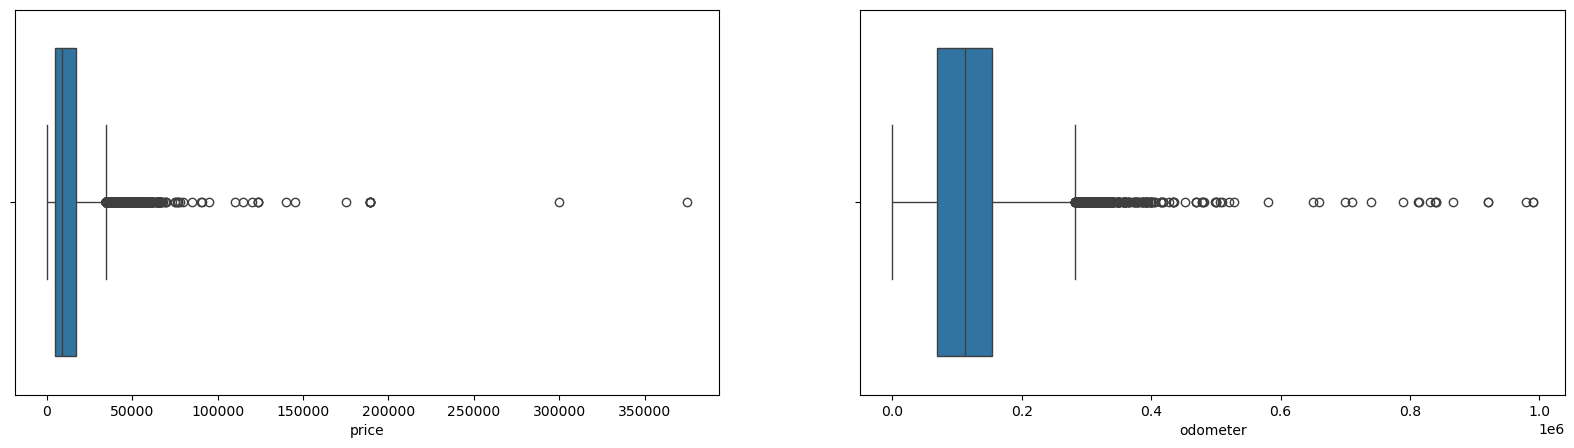

In [102]:
#outliers by Boxplot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df["price"], ax=ax[0])
sns.boxplot(x=df["odometer"], ax=ax[1])
plt.show()

Some values ​​are atypical according to the graphical analysis

In [103]:
# removal of outliers IQR method
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_filtered

In [104]:
# adjust date_posted column to date data
df["date_posted"] = pd.to_datetime(df["date_posted"], format='%Y-%m-%d')

In [105]:
#change verification
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47128 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47128 non-null  int64         
 1   model_year    47128 non-null  int64         
 2   condition     47128 non-null  object        
 3   cylinders     47128 non-null  int64         
 4   fuel          47128 non-null  object        
 5   odometer      47128 non-null  int64         
 6   transmission  47128 non-null  object        
 7   type          47128 non-null  object        
 8   paint_color   47128 non-null  object        
 9   is_4wd        47128 non-null  int32         
 10  date_posted   47128 non-null  datetime64[ns]
 11  days_listed   47128 non-null  int64         
 12  manufacturer  47128 non-null  object        
 13  model_name    47128 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(7)
memory usage: 5.2+ MB


In [106]:
df.head(5)

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,model_name
0,9400,2011,good,6,gas,145000,automatic,SUV,black,1,2018-06-23,19,bmw,x5
1,25500,2003,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,ford,f-150
2,5500,2013,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai,sonata
3,1500,2003,fair,8,gas,99000,automatic,pickup,white,0,2019-03-22,9,ford,f-150
4,14900,2017,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler,200



It is time to export the data after the adjustments and cleaning performed on the file

In [107]:
df.to_csv('../vehicles_us_ok.csv', index=False)

## Graphical outputs of results

In [108]:
# Histogram Condition vs year
fig = px.histogram(df, x="model_year", color="condition", hover_data=df.columns)
fig.show()

In [109]:
# Nunmber vehicles by manufacturer
fig = px.histogram(df, x="manufacturer", title="Number of cars for each manufacturer")
fig.show()

In [110]:
# Vehicle type by manufacture
fig = px.histogram(df, x="manufacturer", color="type", title="Number of cars for each manufacturer")
fig.show()